# Modelling Car Price using Linear Regression Model

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

In [1]:
# Supress those warnings which are not major
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import numpy and pandas libraries for analysis
import numpy as np
import pandas as pd

## 1. Reading and understanding the data 

In [3]:
# Reading the data used for the analysis
carprice=pd.read_csv("D:/Suman/Suman D Drive/HR/Upgrad/Linear Regression/Linear Regression Assignment/CarPrice_Assignment.csv")

In [4]:
# Checking first few entries for preliminary understanding of data
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Since all the columns are not visible, setting an option so that all the columns can be viewed
pd.set_option('display.max_columns',500)

In [6]:
# Again, checking the first few entries for all column at one go for preliminary understanding of the data
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Checking the number of columns and rows in the data
carprice.shape

(205, 26)

In [8]:
# Checking the datatype of each variable and number of missing values for each variables
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Observation: The data doesn't have any null value. Hence misssing value treatment is not required

### 2. Cleaning the data

In [9]:
# Droping all the duplicate rows, if present in the data
carprice=carprice.drop_duplicates()

In [10]:
# Dropping 'car_ID' column from the data this insignificant for the analysis
carprice=carprice.drop(['car_ID'], axis=1)

In [11]:
# Again, checking the number of columns and rows
carprice.shape

(205, 25)

##### Observation: It is observed that there are no duplicate rows and 'car_ID' column is removed from the data

In [12]:
# Making a uniform datatype for all the numerical variables by converting all of them into float64

carprice['highwaympg']=carprice['highwaympg'].astype('float64')
carprice['citympg']=carprice['citympg'].astype('float64')
carprice['peakrpm']=carprice['peakrpm'].astype('float64')
carprice['horsepower']=carprice['horsepower'].astype('float64')
carprice['enginesize']=carprice['enginesize'].astype('float64')
carprice['curbweight']=carprice['curbweight'].astype('float64')
carprice['symboling']=carprice['symboling'].astype('float64')

In [13]:
# Again checking the information about the data after conversion of datatypes of numerical variables

carprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null float64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null float64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null float64
peakrpm             205 non-null float64
cit

### 3. Exploratory Data Analysis (EDA) for better understanding of the data

### 3.1 Analysis of Numerical Variables

In [14]:
# Importing required libraries for plotting of the numerical data and categorical data 

import matplotlib.pyplot as plt
import seaborn as sns

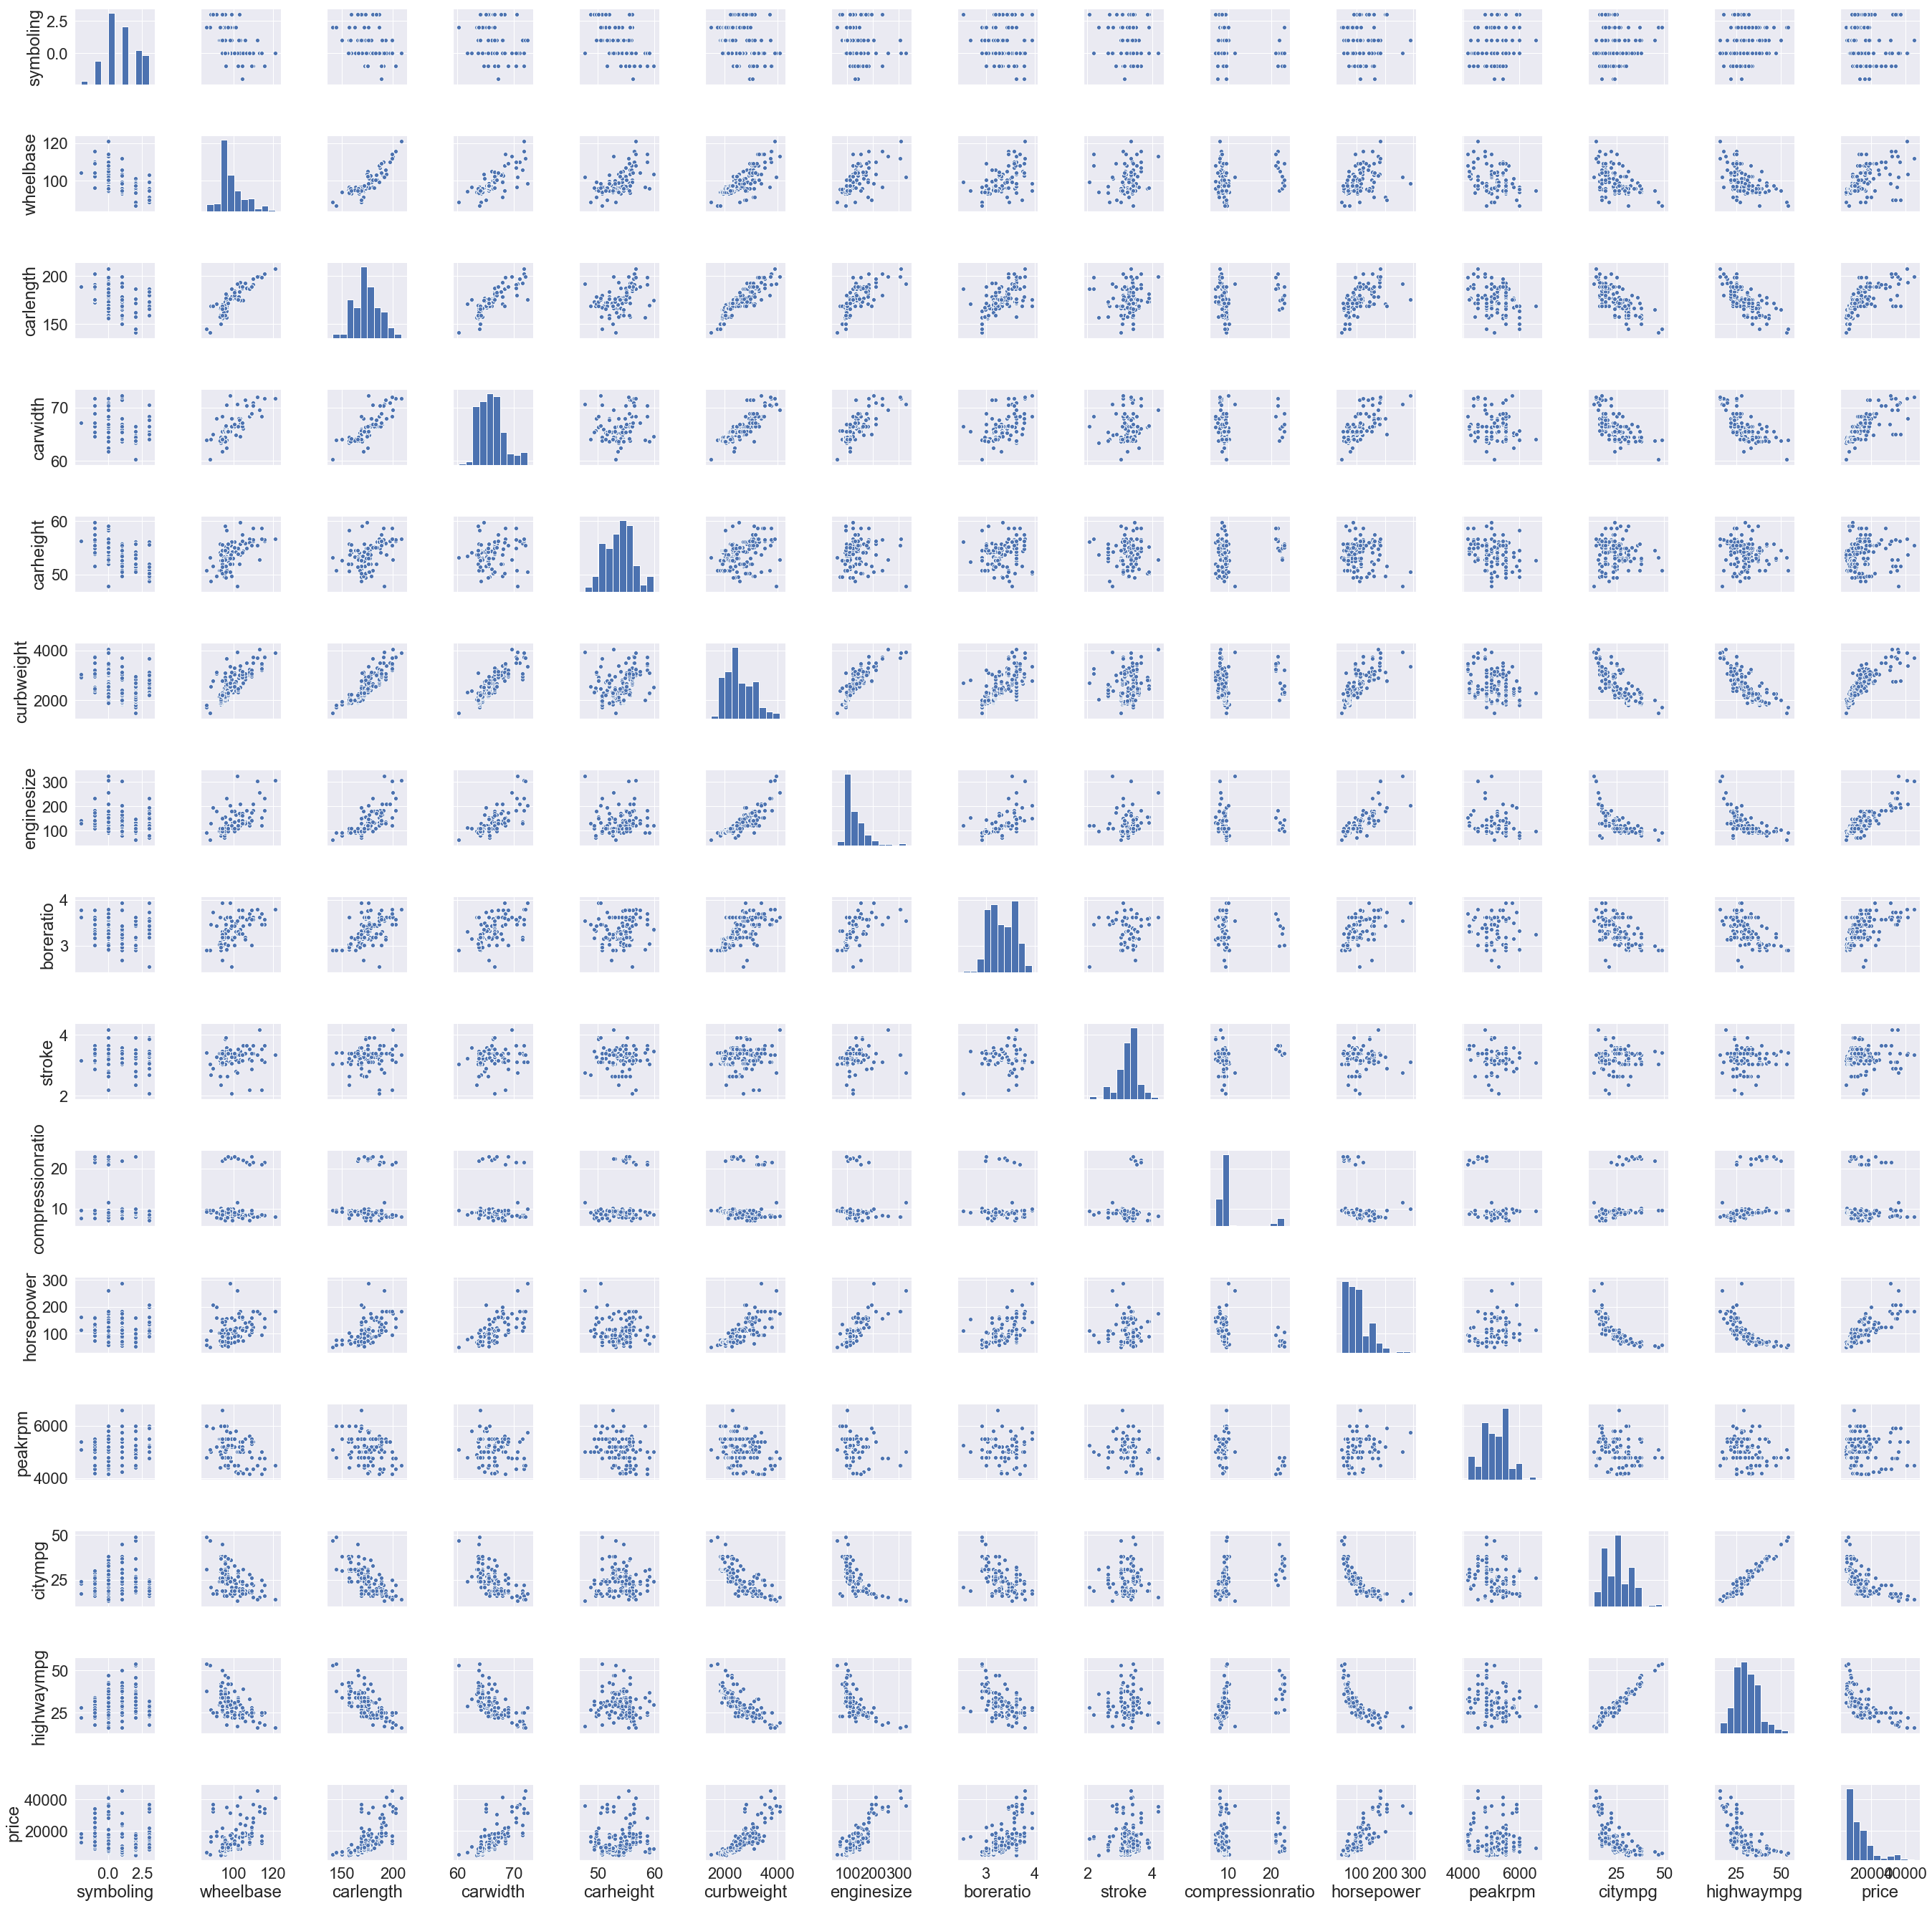

In [15]:
# Plotting a pairplot for all the numerical variable to check the collinearity between them

sns.set(font_scale=2)
sns.pairplot(carprice)
plt.show()

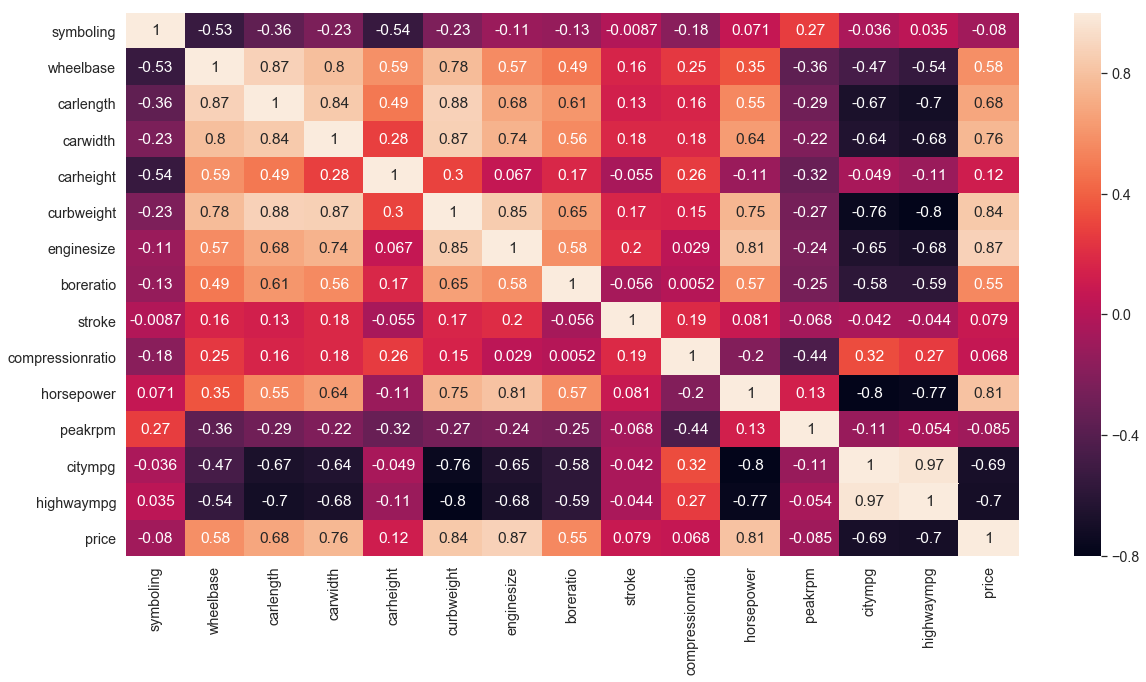

In [16]:
# Creating heatmap with coefficient of correlation to quantify the correlation between numerical variables

sns.set(font_scale=1.3)
plt.figure(figsize = (20,10))
sns.heatmap(carprice.corr(),annot = True)

#### Observations: Curbweight has high correlation with wheelbase, carlength, carwidth, enginesise and price

### 3.2 Analysis of categorical variables

In [17]:
# Extracting car company name after splitting and updating the data

extract_company=carprice['CarName'].str.split(" ",n=1, expand=True)
carprice['companyname']=extract_company[0]

# Checking the data about the implementation of the above operation

carprice.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
1,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero
2,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero
3,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi
4,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,audi


In [18]:
# It is oobserved that the companyname is successfully added in the database. Hence, we can drop the "CarName" column from the database

carprice=carprice.drop(['CarName'], axis=1)

In [19]:
# Checking the shape of the data to check the implementation of above columns dropping operation

carprice.shape

(205, 25)

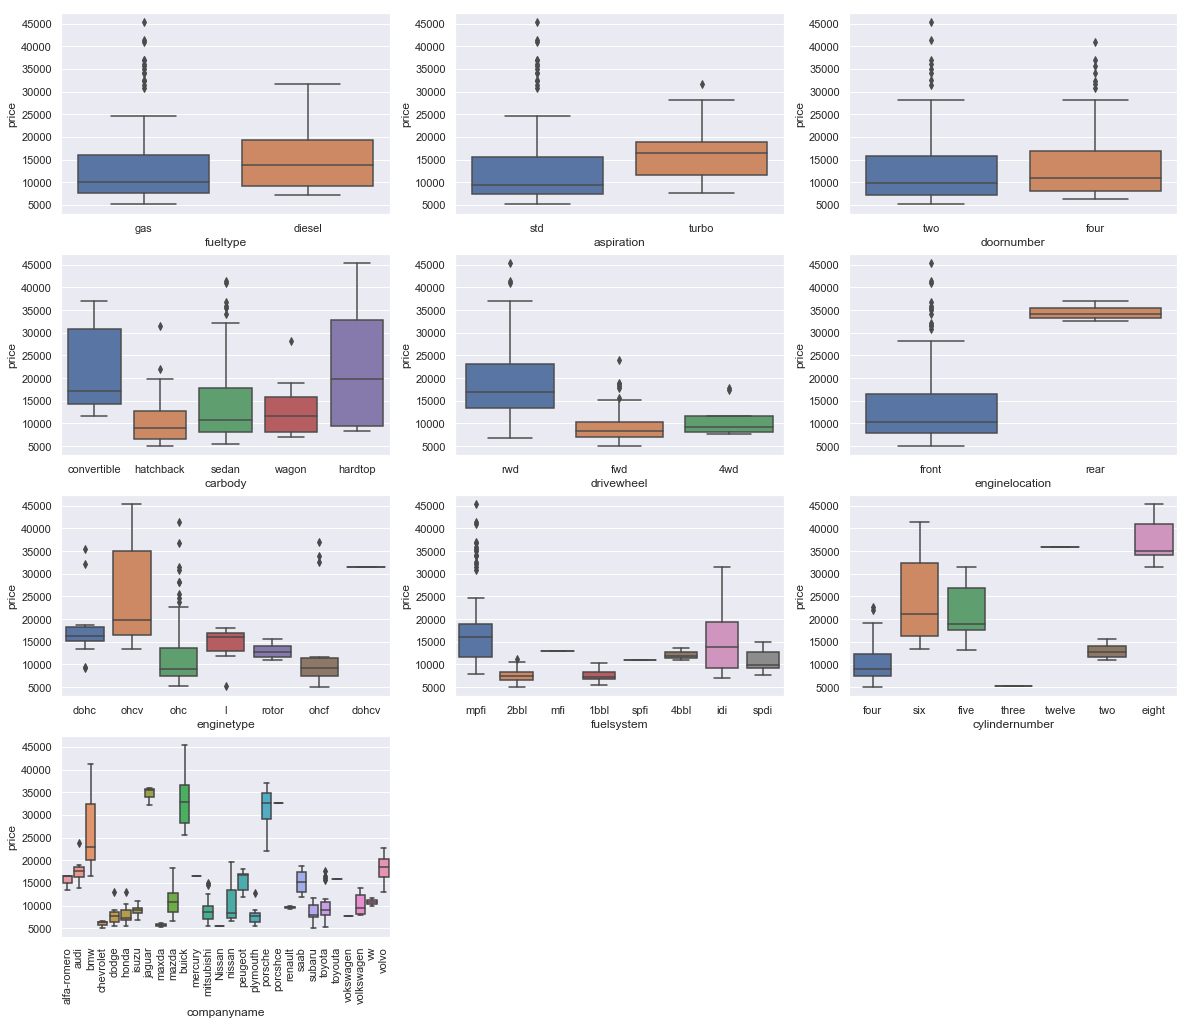

In [20]:
# Plotting box plot for all the categorical varibales against price of the car to check the relation between them

sns.set(font_scale=1)
plt.figure(figsize=(20,17))
plt.subplot(4,3,1)
sns.boxplot(x='fueltype', y='price', data= carprice)
plt.subplot(4,3,2)
sns.boxplot(x='aspiration', y='price', data=carprice)
plt.subplot(4,3,3)
sns.boxplot(x='doornumber', y='price', data=carprice)
plt.subplot(4,3,4)
sns.boxplot(x='carbody', y='price', data=carprice)
plt.subplot(4,3,5)
sns.boxplot(x='drivewheel', y='price', data=carprice)
plt.subplot(4,3,6)
sns.boxplot(x='enginelocation', y='price', data=carprice)
plt.subplot(4,3,7)
sns.boxplot(x='enginetype', y='price', data=carprice)
plt.subplot(4,3,8)
sns.boxplot(x='fuelsystem', y='price', data=carprice)
plt.subplot(4,3,9)
sns.boxplot(x='cylindernumber', y='price', data=carprice)
plt.subplot(4,3,10)
plt.xticks(rotation=90)                                 # Changing the rotation of the x-labels for better readability 
sns.boxplot(x='companyname', y='price', data=carprice)
plt.show()


#### Observations:
#### 1. It is observed that except for fuel type and door number, all the variables have some impact on the price of the car
#### 2. There are spelling mistakes in the name of the car company. We need to rectify this before further analysis

In [21]:
# Rectifying the errors in the spelling mistakes of car company name as observed from the above box plot

carprice.companyname=carprice.companyname.replace({'vokswagen':'volkswagen','vw':'volkswagen','toyouta':'toyota','porcshce':'porsche','Nissan':'nissan', 'maxda':'mazda'},regex=True)

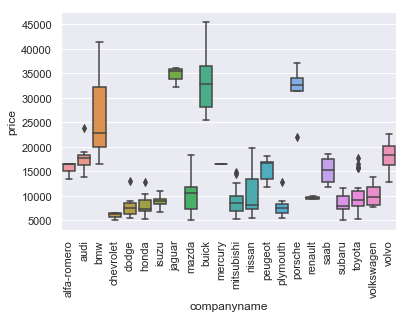

In [22]:
# Again plotting car company name against price to check whether the names are fully rectified or not

sns.boxplot(x='companyname', y='price', data=carprice)
plt.xticks(rotation=90)
plt.show()

### 4. Encoding of categorical variables

In [23]:
# Checking the numbers of levels in each categorical variables

carprice[{'fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','companyname'}].nunique()

enginelocation     2
enginetype         7
drivewheel         3
cylindernumber     7
companyname       22
carbody            5
doornumber         2
fueltype           2
fuelsystem         8
aspiration         2
dtype: int64

### 4.1 Mapping of categorical variables with two levels and ordinal categorical variables

In [24]:
# Mapping front and rear level of enginelocation with 1 and 0 respectively with replace function

carprice.enginelocation=carprice.enginelocation.replace({'front':1,'rear':0},regex=True)

In [25]:
# Mapping std and turbo levels of aspiration with 1 and 0 respectively with replace function

carprice.aspiration=carprice.aspiration.replace({'std':1,'turbo':0},regex=True)

In [26]:
# Mapping gas and diesel levels of fueltype with 1 and 0 respectively with replace function

carprice.fueltype=carprice.fueltype.replace({'gas':1,'diesel':0},regex=True)

In [27]:
# Mapping the levels of doornumber variables to their corresponding values i.e. two:2 and four:4 using replace function

carprice.doornumber=carprice.doornumber.replace({'two':2,'four':4},regex=True)

In [28]:
# Mapping the levels of doornumber variables to their corresponding values i.e. two:2, three:3, etc. using replace function

carprice.cylindernumber=carprice.cylindernumber.replace({'two':2, 'three':3,'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12},regex=True)

In [29]:
# Checking the information about the data for above implementation

carprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null float64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null float64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null float64
peakrpm             205 non-null float64
citympg             205 non-null float64
highway

In [30]:
# Checking the count of each levels of companename as there are more number of levels

carprice.groupby('companyname')['companyname'].count()

companyname
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: companyname, dtype: int64

### 4.2 Creating dummy variables for categorical variables

In [31]:
# Creating dummy variables of companyname, dropping the first column and thereafter merging to the main dataset

companyname_dummy = pd.get_dummies(carprice['companyname'], drop_first = True)
carprice = pd.concat([carprice, companyname_dummy], axis = 1)
carprice.drop(['companyname'], axis = 1, inplace = True)

In [32]:
# Creating dummy variables of enginetype, dropping the first column and thereafter merging to the main dataset

enginetype_dummy = pd.get_dummies(carprice['enginetype'], drop_first = True)
carprice = pd.concat([carprice, enginetype_dummy], axis = 1)
carprice.drop(['enginetype'], axis = 1, inplace = True)

In [33]:
# Creating dummy variables of fuelsystem, dropping the first column and thereafter merging to the main dataset

fuelsystem_dummy = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
carprice = pd.concat([carprice, fuelsystem_dummy], axis = 1)
carprice.drop(['fuelsystem'], axis = 1, inplace = True)

In [34]:
# Creating dummy variables of drivewheel, dropping the first column and thereafter merging to the main dataset

drivewheel_dummy = pd.get_dummies(carprice['drivewheel'], drop_first = True)
carprice = pd.concat([carprice, drivewheel_dummy], axis = 1)
carprice.drop(['drivewheel'], axis = 1, inplace = True)

In [35]:
# Creating dummy variables of carbody, dropping the first column and thereafter merging to the main dataset

carbody_dummy = pd.get_dummies(carprice['carbody'], drop_first = True)
carprice = pd.concat([carprice, carbody_dummy], axis = 1)
carprice.drop(['carbody'], axis = 1, inplace = True)

In [36]:
# Checking the shape of the dataset after creating dummyvariables

carprice.shape

(205, 60)

### 5. Building a model for car price using multiple regression

### 5.1 Test-Train split

In [37]:
# Importing test_train_split from sklearn
# Splitting the data into 30:70 for test data and train data respectively 

from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(carprice, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
# Checking the shape of train data

df_train.shape

(143, 60)

In [39]:
# Checking the shape of test data 

df_test.shape

(62, 60)

### 5.2 Scaling all the numerical variables using MinMax Scaler

In [40]:
# Importing the MinMaxScaler from sklearn for scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [41]:
# Groping all the variables together which require scaling
# Scaling the variables using fit-transform

scaling_variables=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','doornumber','cylindernumber','symboling','price']
df_train[scaling_variables]=scaler.fit_transform(df_train[scaling_variables])

# Checking the dataset to check the above scaling transformation

df_train.head()

C:\Users\Suman.Khanal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,fwd,rwd,hardtop,hatchback,sedan,wagon
122,0.6,1,1,1.0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
125,1.0,1,1,0.0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
166,0.6,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1.0,1,1,0.0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
199,0.2,1,0,1.0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [42]:
# Again, checking the shape of the train data after scaling

df_train.shape

(143, 60)

In [43]:
# Creating dataframes for dependent and independent variables from the train dataset for model building

y_train=df_train.pop('price')
x_train=df_train

In [44]:
x_train.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,fwd,rwd,hardtop,hatchback,sedan,wagon
122,0.6,1,1,1.0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
125,1.0,1,1,0.0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
166,0.6,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1.0,1,1,0.0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
199,0.2,1,0,1.0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


### 5.3 Model Building

### 5.3.1 Model with all the variables
Before building a model with selected variables lets create a model with all the variables for comparision

In [45]:
# Importing statsmodels and adding constant

import statsmodels.api as sm
x_train_all=sm.add_constant(x_train)

In [46]:
# Creating a models with all the variables 

model1=sm.OLS(y_train,x_train_all).fit()

In [47]:
# Printing the summary of the models to check its performance through various statistics

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.61e-50
Time:                        22:21:47   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3087      0.087  

#### Observation: The predictive power of the model is strong with r-square 0.97 but F-statistics is low which might mean that overall significance of variables is low. But to confirm this we need to compare with other models

### 5.3.2 Building model with 15 variables using RFE

In [48]:
# Importing required libraries and packages for building models using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Fitting rfe with x_train and y_train with required number of variables

lm15=LinearRegression()
lm15.fit(x_train,y_train)
rfe15=RFE(lm15,15)
rfe15=rfe15.fit(x_train,y_train)

In [50]:
# Creating the list of variables from x_train with ranking from above rfe

list(zip(x_train.columns,rfe15.support_,rfe15.ranking_))

[('symboling', False, 35),
 ('fueltype', False, 2),
 ('aspiration', False, 15),
 ('doornumber', False, 37),
 ('enginelocation', True, 1),
 ('wheelbase', False, 4),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 13),
 ('peakrpm', True, 1),
 ('citympg', False, 6),
 ('highwaympg', False, 26),
 ('audi', False, 28),
 ('bmw', True, 1),
 ('buick', False, 36),
 ('chevrolet', False, 22),
 ('dodge', False, 19),
 ('honda', False, 23),
 ('isuzu', False, 30),
 ('jaguar', False, 24),
 ('mazda', False, 32),
 ('mercury', False, 39),
 ('mitsubishi', False, 16),
 ('nissan', False, 29),
 ('peugeot', True, 1),
 ('plymouth', False, 20),
 ('porsche', True, 1),
 ('renault', False, 25),
 ('saab', False, 5),
 ('subaru', False, 11),
 ('toyota', False, 31),
 ('volkswagen', False, 27),
 ('volvo', False, 

In [51]:
# Creating a bucket of significant variables

significant_variables=x_train.columns[rfe15.support_]
significant_variables

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'bmw', 'peugeot', 'porsche', 'l', 'idi'],
      dtype='object')

In [52]:
# Creating a bucket of insignificant variables

x_train.columns[~rfe15.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carheight', 'horsepower', 'citympg', 'highwaympg', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'dohcv', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [53]:
# Building x-train dataset with significant variables from above

x_train2=x_train[significant_variables]

In [54]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train2=sm.add_constant(x_train2)

In [55]:
# Building a model with 15 significant variables

model2=sm.OLS(y_train,x_train2).fit()

In [56]:
# Printing the summary of the models to check its performance through various statistics

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.29e-68
Time:                        22:21:47   Log-Likelihood:                 214.16
No. Observations:                 143   AIC:                            -396.3
Df Residuals:                     127   BIC:                            -348.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3682      0.087  

#### Observations: The r-squared and adj r-squared have decreased but F-statistics, AIC, BIC have improved significantly in this model as compared to the models with all the variables

### 5.3.3 Building model with 10 variables using RFE

In [57]:
# Fitting rfe with x_train and y_train with required number of variables

lm10=LinearRegression()
lm10.fit(x_train,y_train)
rfe10=RFE(lm10,10)
rfe10=rfe10.fit(x_train,y_train)

In [58]:
# Creating the list of variables from x_train with ranking from above rfe

list(zip(x_train.columns,rfe10.support_,rfe10.ranking_))

[('symboling', False, 40),
 ('fueltype', False, 7),
 ('aspiration', False, 20),
 ('doornumber', False, 42),
 ('enginelocation', True, 1),
 ('wheelbase', False, 9),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 6),
 ('horsepower', False, 18),
 ('peakrpm', False, 4),
 ('citympg', False, 11),
 ('highwaympg', False, 31),
 ('audi', False, 33),
 ('bmw', True, 1),
 ('buick', False, 41),
 ('chevrolet', False, 27),
 ('dodge', False, 24),
 ('honda', False, 28),
 ('isuzu', False, 35),
 ('jaguar', False, 29),
 ('mazda', False, 37),
 ('mercury', False, 44),
 ('mitsubishi', False, 21),
 ('nissan', False, 34),
 ('peugeot', False, 2),
 ('plymouth', False, 25),
 ('porsche', True, 1),
 ('renault', False, 30),
 ('saab', False, 10),
 ('subaru', False, 16),
 ('toyota', False, 36),
 ('volkswagen', False, 32),
 ('volvo', Fa

In [59]:
# Creating a bucket of significant variables

significant_variables_10=x_train.columns[rfe10.support_]
significant_variables_10

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'porsche'],
      dtype='object')

In [60]:
# Building x-train dataset with significant variables from above

x_train2_10=x_train[significant_variables_10]

In [61]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train2_10=sm.add_constant(x_train2_10)

In [62]:
# Building a model with 10 significant variables

model2_10=sm.OLS(y_train,x_train2_10).fit()

In [63]:
# Printing the summary of the models to check its performance through various statistics

print(model2_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.56e-66
Time:                        22:21:48   Log-Likelihood:                 194.04
No. Observations:                 143   AIC:                            -366.1
Df Residuals:                     132   BIC:                            -333.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4422      0.093      4.

#### Observations: The r-squared and adj r-squared have decreased to 0.91 but F-statistics have improved as compared to the models with all the variables and models with 15 variables

### 5.3.4 Building model with 20 variables using RFE

In [64]:
# Fitting rfe with x_train and y_train with required number of variables

lm20=LinearRegression()
lm20.fit(x_train,y_train)
rfe20=RFE(lm20,20)
rfe20=rfe20.fit(x_train,y_train)

In [65]:
# Creating the list of variables from x_train with ranking from above rfe

list(zip(x_train.columns,rfe20.support_,rfe20.ranking_))

[('symboling', False, 30),
 ('fueltype', True, 1),
 ('aspiration', False, 10),
 ('doornumber', False, 32),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 8),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 21),
 ('audi', False, 23),
 ('bmw', True, 1),
 ('buick', False, 31),
 ('chevrolet', False, 17),
 ('dodge', False, 14),
 ('honda', False, 18),
 ('isuzu', False, 25),
 ('jaguar', False, 19),
 ('mazda', False, 27),
 ('mercury', False, 34),
 ('mitsubishi', False, 11),
 ('nissan', False, 24),
 ('peugeot', True, 1),
 ('plymouth', False, 15),
 ('porsche', True, 1),
 ('renault', False, 20),
 ('saab', True, 1),
 ('subaru', False, 6),
 ('toyota', False, 26),
 ('volkswagen', False, 22),
 ('volvo', False, 38),
 

In [66]:
# Creating a bucket of significant variables

significant_variables_20=x_train.columns[rfe20.support_]
significant_variables_20

Index(['fueltype', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'bmw', 'peugeot', 'porsche',
       'saab', 'l', 'rotor', 'idi'],
      dtype='object')

In [67]:
# Building x-train dataset with significant variables from above

x_train2_20=x_train[significant_variables_20]

In [68]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train2_20=sm.add_constant(x_train2_20)

In [69]:
# Building a model with 15 significant variables

model2_20=sm.OLS(y_train,x_train2_20).fit()

In [70]:
# Printing the summary of the models to check its performance through various statistics

print(model2_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.06e-66
Time:                        22:21:49   Log-Likelihood:                 220.05
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     123   BIC:                            -340.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3300      0.077  

### Comparision of models with all variables, 20 variables, 15 variables and 10 variables
#### 1. Even though R-squared values is highest (0.97) for model with all the variables, its F-statistics, AIC, BIC are low. Hence we will drop this model for further analysis
#### 2. The R-squared values for models with 15 and 20 variables is almost similar but F-statistics is more for models with 15 variables indicating that overall significance of the these variables is more comparativley. Hence, we will drop model with 20 variables for further analysis
#### 3. Between models with 10 and 15 variables, the F-statistics is better for model with 10 variables but its R-square, AIC and BIC is less as compared to the models with 15 variables. Hence we will drop models with 10 variables for further analysis

### 5.3.5 Selecting model with 15 variables for further tuning: Model 3

In [71]:
# Printing the summary of the models to check its performance through various statistics

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.29e-68
Time:                        22:21:49   Log-Likelihood:                 214.16
No. Observations:                 143   AIC:                            -396.3
Df Residuals:                     127   BIC:                            -348.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3682      0.087  

In [72]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X2=x_train2.drop(['const'],axis=1)
vif['Features']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,enginelocation,144.46
5,enginesize,127.40
4,cylindernumber,84.58
8,compressionratio,83.68
3,curbweight,75.50
14,idi,64.41
1,carlength,61.42
6,boreratio,44.49
2,carwidth,44.23
7,stroke,41.59


In [73]:
# enginelocation has the highest VIF indicating that this feature is explained by other variables.
# We will drop this variable  and create the model

x_train3=x_train2.drop(['enginelocation'],axis=1)

In [74]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train3=sm.add_constant(x_train3)

In [75]:
# Building a model

model3=sm.OLS(y_train,x_train3).fit()

In [76]:
# Printing the summary of the models to check its performance through various statistics

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.11e-67
Time:                        22:21:50   Log-Likelihood:                 207.69
No. Observations:                 143   AIC:                            -385.4
Df Residuals:                     128   BIC:                            -340.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1552      0.065  

#### Observation: The adj. R-squared (0.92) and F-statistics still remains similar after droping 'enginelocation'

In [77]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X3=x_train3.drop(['const'],axis=1)
vif['Features']=X3.columns
vif['VIF']=[variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
7,compressionratio,72.17
2,curbweight,66.50
0,carlength,57.89
13,idi,55.18
4,enginesize,50.40
1,carwidth,43.84
3,cylindernumber,34.22
5,boreratio,15.24
6,stroke,11.92
10,peugeot,10.67


### 5.3.6 Building model 4 with further tuning

In [78]:
# compressionratio has the highest VIF and p-value>0.05 indicating that this feature is explained by other variables.
# We will drop this variable  and create the model

x_train4=x_train3.drop(['compressionratio'],axis=1)

In [79]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train4=sm.add_constant(x_train4)

In [80]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model4=sm.OLS(y_train,x_train4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.38e-68
Time:                        22:21:50   Log-Likelihood:                 207.15
No. Observations:                 143   AIC:                            -386.3
Df Residuals:                     129   BIC:                            -344.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1322      0.060      2.

#### Observation: The adj. R-squared (0.92) still remains similar but F-statistics has improved after droping 'compressionratio'. The p-value of car length is very high

In [81]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X4=x_train4.drop(['const'],axis=1)
vif['Features']=X4.columns
vif['VIF']=[variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,curbweight,62.86
0,carlength,53.95
4,enginesize,45.73
1,carwidth,43.13
3,cylindernumber,22.40
5,boreratio,13.01
6,stroke,11.69
9,peugeot,10.29
11,l,9.50
7,peakrpm,8.19


### 5.3.7 Building model 5 with further tuning

In [82]:
# carlength has the highest VIF and p-value>0.05 indicating that this feature is explained by other variables.
# We will drop this variable  and create the model

x_train5=x_train4.drop(['carlength'],axis=1)

In [83]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train5=sm.add_constant(x_train5)

In [84]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model5=sm.OLS(y_train,x_train5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.37e-68
Time:                        22:21:50   Log-Likelihood:                 206.38
No. Observations:                 143   AIC:                            -386.8
Df Residuals:                     130   BIC:                            -348.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1281      0.060      2.

#### Observation: The adj. R-squared (0.92) still remains similar but F-statistics has improved after droping 'carlength'. The p-value value of all the variables are within the limit

In [85]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X5=x_train5.drop(['const'],axis=1)
vif['Features']=X5.columns
vif['VIF']=[variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,curbweight,48.23
3,enginesize,42.13
0,carwidth,36.73
2,cylindernumber,21.71
5,stroke,11.10
4,boreratio,10.43
8,peugeot,10.16
10,l,9.40
6,peakrpm,8.13
11,idi,1.90


### 5.3.8 Building model 6 with further tuning

In [86]:
# compressionratio has the highest VIF indicating that this feature is explained by other variables.
# We will drop this variable and create the model

x_train6=x_train5.drop(['curbweight'],axis=1)

In [87]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train6=sm.add_constant(x_train6)

In [88]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model6=sm.OLS(y_train,x_train6).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     139.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.36e-66
Time:                        22:21:51   Log-Likelihood:                 198.53
No. Observations:                 143   AIC:                            -373.1
Df Residuals:                     131   BIC:                            -337.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1861      0.062      3.

#### Observation: The adj. R-squared has decreased marginally to 0.91 and F-statistics still remains similar after droping 'carlength'. The p-value of the all the variables are less than 0.05

In [89]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X6=x_train6.drop(['const'],axis=1)
vif['Features']=X6.columns
vif['VIF']=[variance_inflation_factor(X6.values,i) for i in range(X6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,24.29
2,enginesize,24.07
1,cylindernumber,19.92
4,stroke,10.91
3,boreratio,10.24
7,peugeot,10.08
9,l,9.40
5,peakrpm,7.93
10,idi,1.86
8,porsche,1.23


### 5.3.9 Building model 7 with further tuning

In [90]:
# As we observed in EDA that carwidth and enginesize are correlated to car price.
# We will try builing by dropping cylindernumber which also has high VIF

x_train7=x_train6.drop(['cylindernumber'],axis=1)

In [91]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train7=sm.add_constant(x_train7)

In [92]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model7=sm.OLS(y_train,x_train7).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.43e-58
Time:                        22:21:51   Log-Likelihood:                 175.04
No. Observations:                 143   AIC:                            -328.1
Df Residuals:                     132   BIC:                            -295.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1930      0.037     -5.268      0.0

#### Observation: The adj. R-squared has decreased marginally to 0.88. Also, F-statistics has decreased marginally after droping 'cylindenumber'. The p-value of boreratio increased to 0.5 which is very high

In [93]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X7=x_train7.drop(['const'],axis=1)
vif['Features']=X7.columns
vif['VIF']=[variance_inflation_factor(X7.values,i) for i in range(X7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,23.76
3,stroke,10.89
1,enginesize,10.47
6,peugeot,9.90
2,boreratio,9.58
8,l,9.32
4,peakrpm,6.73
9,idi,1.86
7,porsche,1.23
5,bmw,1.15


### 5.3.10 Building model 8 with further tuning

In [94]:
# boreratio has the highest VIF indicating that this feature is explained by other variables  and p-value is also >0.05.
# Lets drop boreratio and build the model

x_train8=x_train7.drop(['boreratio'],axis=1)

In [95]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train8=sm.add_constant(x_train8)

In [96]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model8=sm.OLS(y_train,x_train8).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.54e-59
Time:                        22:21:51   Log-Likelihood:                 174.86
No. Observations:                 143   AIC:                            -329.7
Df Residuals:                     133   BIC:                            -300.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2054      0.030     -6.933      0.0

#### Observation: The adj. R-squared (0.88) still remains similar but F-statistics has improved after droping 'boreratio'. The p-value of all the variables are within the limit

In [97]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X8=x_train8.drop(['const'],axis=1)
vif['Features']=X8.columns
vif['VIF']=[variance_inflation_factor(X8.values,i) for i in range(X8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,19.24
2,stroke,10.86
1,enginesize,10.32
5,peugeot,9.90
7,l,9.29
3,peakrpm,6.68
8,idi,1.86
6,porsche,1.19
4,bmw,1.14


### 5.3.11 Building model 9 with further tuning

In [98]:
# Stroke has high VIF, indicating multi-collinearity and slightly more p-value.
# Hence, we will drop this variable for further model building

x_train9=x_train8.drop(['stroke'],axis=1)

In [99]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train9=sm.add_constant(x_train9)

In [100]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model9=sm.OLS(y_train,x_train9).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.18e-59
Time:                        22:21:52   Log-Likelihood:                 171.95
No. Observations:                 143   AIC:                            -325.9
Df Residuals:                     134   BIC:                            -299.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2434      0.025     -9.646      0.0

#### Observation: The adj. R-squared has decreased marginally to 0.87 but F-statistics has improved after droping 'stroke'. The p-value of all the variables are less than 0.05

In [101]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X9=x_train9.drop(['const'],axis=1)
vif['Features']=X9.columns
vif['VIF']=[variance_inflation_factor(X9.values,i) for i in range(X9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,carwidth,17.87
1,enginesize,10.01
4,peugeot,9.73
6,l,9.20
2,peakrpm,4.29
7,idi,1.60
3,bmw,1.14
5,porsche,1.08


### 5.3.12 Building model 10 with further tuning

In [102]:
# carwidth has the highest VIF, indicating that this feature is explained by other variables.
# We will drop this variable and create the model

x_train10=x_train9.drop(['carwidth'],axis=1)

In [103]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train10=sm.add_constant(x_train10)

In [104]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model10=sm.OLS(y_train,x_train10).fit()
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     98.92
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.49e-50
Time:                        22:21:52   Log-Likelihood:                 146.58
No. Observations:                 143   AIC:                            -277.2
Df Residuals:                     135   BIC:                            -253.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1630      0.027     -5.988      0.0

In [105]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X10=x_train10.drop(['const'],axis=1)
vif['Features']=X10.columns
vif['VIF']=[variance_inflation_factor(X10.values,i) for i in range(X10.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,peugeot,9.30
5,l,9.10
0,enginesize,2.62
1,peakrpm,2.10
6,idi,1.36
2,bmw,1.13
4,porsche,1.07


In [106]:
# l has the highest VIF indicating that this feature is explained by other variables and p-value>0.05 
# We will drop this variable and create the model

x_train11=x_train10.drop(['l'],axis=1)

In [107]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train11=sm.add_constant(x_train11)

In [108]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model11=sm.OLS(y_train,x_train11).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           7.69e-51
Time:                        22:21:52   Log-Likelihood:                 146.10
No. Observations:                 143   AIC:                            -278.2
Df Residuals:                     136   BIC:                            -257.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1596      0.027     -5.916      0.0

#### Observation: The adj. R-squared (0.82) still remains similar but F-statistics has improved after droping 'l'

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X11=x_train11.drop(['const'],axis=1)
vif['Features']=X11.columns
vif['VIF']=[variance_inflation_factor(X11.values,i) for i in range(X11.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,enginesize,2.61
1,peakrpm,2.08
5,idi,1.36
3,peugeot,1.20
2,bmw,1.13
4,porsche,1.07


### 5.3.14 Building model 12 with further tuning

In [110]:
# Since all the variables have VIF less than 5 but peugeot have p-value more than 0.05
# We will drop this variable and create the model

x_train12=x_train11.drop(['peugeot'],axis=1)

In [111]:
# Importing statsmodel and adding constant to the x_train dataset

import statsmodels.api as sm
x_train12=sm.add_constant(x_train12)

In [112]:
# Building a model
# Printing the summary of the models to check its performance through various statistics

model12=sm.OLS(y_train,x_train12).fit()
print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.62e-52
Time:                        22:21:53   Log-Likelihood:                 146.03
No. Observations:                 143   AIC:                            -280.1
Df Residuals:                     137   BIC:                            -262.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1586      0.027     -5.927      0.0

In [113]:
# Creating a dataframe with VIF for each of the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X12=x_train12.drop(['const'],axis=1)
vif['Features']=X12.columns
vif['VIF']=[variance_inflation_factor(X12.values,i) for i in range(X12.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,enginesize,2.58
1,peakrpm,2.08
4,idi,1.22
2,bmw,1.13
3,porsche,1.07


#### Observation: The adj. R-squared (0.83) and F-statistics has improved after droping 'peugeot'. All the variables have p-value less than 0.05 and VIF less than 5. This seems to be a good pricing model. However, we will check the performance of this model to confirm

### 5.4 Checking the performance of the model

### 5.4.1 Residual analysis of error terms

In [114]:
# Predicting the car prices values based on the train data with the model that we have built

y_train_price = model12.predict(x_train12)

In [115]:
# Importing the required libraries for plotting

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

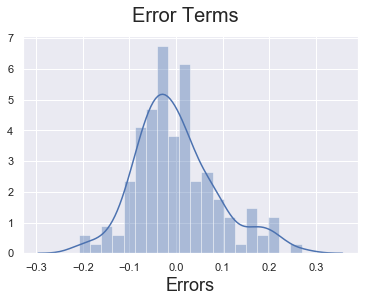

In [116]:
# First calculating the error terms with the help of predicted car prices and car prices in the train data
#Plotting the error terms to check its distribution

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

#### Observation: It is observed from the above plot that error terms is normally distributed around 0 and this validates our assumption on error term as well

### 5.4.2 Prediction on the test data

In [117]:
# Checking the few entries of test data

df_test.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,fwd,rwd,hardtop,hatchback,sedan,wagon
160,0.0,1,1,4,1,95.7,166.3,64.4,53.0,2094.0,4,98.0,3.19,3.03,9.0,70.0,4800.0,38.0,47.0,7738.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
186,2.0,1,1,4,1,97.3,171.7,65.5,55.7,2275.0,4,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0,8495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
59,1.0,1,1,2,1,98.8,177.8,66.5,53.7,2385.0,4,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,8845.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
165,1.0,1,1,2,1,94.5,168.7,64.0,52.6,2265.0,4,98.0,3.24,3.08,9.4,112.0,6600.0,26.0,29.0,9298.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
140,2.0,1,1,2,1,93.3,157.3,63.8,55.7,2240.0,4,108.0,3.62,2.64,8.7,73.0,4400.0,26.0,31.0,7603.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [118]:
# Transforming the test data using only scaler transform rather than just scaler.fit_transform

df_test[scaling_variables] = scaler.transform(df_test[scaling_variables])
df_test.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,fwd,rwd,hardtop,hatchback,sedan,wagon
160,0.4,1,1,1.0,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
186,0.8,1,1,1.0,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
59,0.6,1,1,0.0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
165,0.6,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
140,0.8,1,1,0.0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [119]:
# Preparing dataframe for dependent and independent variables from test data

y_test = df_test.pop('price')
x_test = df_test

In [120]:
# Selecting only significant variables that we observed from our best model

x_test12 = x_test[X12.columns]

In [121]:
# Adding constant to the data frame for independent variables

x_test12= sm.add_constant(x_test12)

In [122]:
# Predicting the car prices for test data based on our model

y_pred=model12.predict(x_test12)

Text(0, 0.5, 'y_pred')

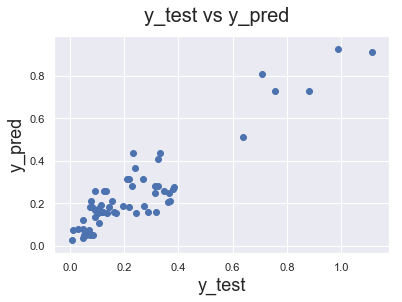

In [123]:
# Plotting the predicted car prices and actual car prices for test data

fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred',fontsize=18)

#### Observations: It is observed that the selected model is able to predict fairly good on the test data, which reinforces that the overall fit of the model is good

In [124]:
df_test.shape

(62, 59)

Text(0, 0.5, 'Price')

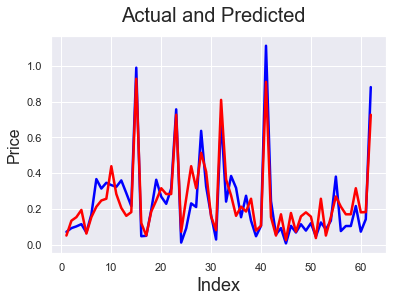

In [125]:
# Plotting the predicted car prices and actual car prices for test data through line chart

c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")

# Plot title

fig.suptitle('Actual and Predicted', fontsize=20)               

# Defining x and y label

plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Price', fontsize=16)                               

### 5.4.3 R-squared for test data based on our model

In [126]:
# Calculating R-squared and MSE value

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [127]:
# Printing the value of the R-squared and MSE value

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008230989014121812
r_square_value : 0.8460007326448564


#### Obsrvations:
#### 1. All the assumptions are validated i.e error terms are normally distributed around the zero
#### 2. R_squared for train data=0.836
#### 3. R_squared for test data= 0.846
#### Conclusion: Based on the the above observations we the model we have build the is a good fit for both test and train data

#### The equation of the final model is
### $carprice= -0.1586 + 1.1361 \times enginesize + 0.1949 \times peakrpm + 0.2349 \times BMW + 0.1762 \times Porsche + 0.1340 \times fuelsystem(idi)$

### 5.5 Model Interpretation

1. Enginesize, peakrpm, BMW, Porsche and fuelsystem(idi) are the most significant variables which impacts the car price. Hence the Geely Auto should focus on these variable while building the model

2. All the predictors have positive coefficient which indicates that car prices increase along with the increase in these variables

3. Enginesize is the most significant predictor with highest coefficient. Geely Auto need to give more importance to enginesize

4. Geely auto should study about BMW and Porsche car features thoroughly and take insights to build its car